# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Overall Analysis

1. There is less data in all categories due to there being less land mass when compared to the Northern Hemisphere.  Depending on the category, this sometimes helped in finding trends and other times didn't.
2. In the case of Humidity, it is consistently high near the equator, then varies more between 10-40 and (-10)-(-40) degrees latitude, and then is consistently high again above 40 degrees latitude.  Above the 40 degrees latitude mark is known as the Humid Continental where humidity is high due to a lack of sunlight and therefore less warmth.  It is not seen in the Southern Hemisphere due to the lack of landmass in comparison.  The data collected matches this trend.
3. City Latitude vs Max Temperature across the board shows the most strength in correlation having a strong negative correlation in the Northern Hemisphere and a strong positive correlation in the Southern Hemisphere.  This accurately represents well known knowledge that temperatures are high near the equator and decrease as we move away from it in either direction.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from datetime import date
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Code found https://www.programiz.com/python-programming/datetime/current-datetime
# Finding current date for later plots.
today = date.today()
curr_date = today.strftime("%b-%d-%Y")

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Set empty lists to hold cities with weather data, their lats and longs, their max temps humidities,
# cloudiness, wind speeds, countries and dates.

new_cities = []
latitudes = []
longitudes = []
max_temps = []
humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

# Creating the base url and what units we want from the weather data API

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setting the output file name for a print log showing the names of the cities and whether they had weather data

output_file = "C://Python-API-Challenge/WeatherPy/Output_Data/city_log.txt"

# Opening the output print log to write data into it

with open(output_file, "w") as datafile:

    # Loop through each city
    
    for city in cities:
    
        # Create search query, make request and store in json
        
        query = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query)
        response_json = response.json()
    
        # Try to grab the lat, long, max temp, humidity, cloudiness, wind speed, country and date
        # of cities if they are available in the Open Weather API.  Grab the city id for print log
        # add cities that do have weather data to a new list.
        
        try:
        
            latitudes.append(response_json['coord']['lat'])
            longitudes.append(response_json['coord']['lon'])
            max_temps.append(response_json['main']['temp_max'])
            humidity.append(response_json['main']['humidity'])
            cloudiness.append(response_json['clouds']['all'])
            wind_speeds.append(response_json['wind']['speed'])
            countries.append(response_json['sys']['country'])
            dates.append(response_json['dt'])
            city_id = response_json['id']
            new_cities.append(city.title())
            
            # Put the city and its id into the output txt file and also print the same values
        
            datafile.write(f"City ID: {city_id}\n")
            datafile.write(f"City Name: {city}\n\n")
        
            print(f"{city_id} {city} was found\n")
        
        # Handle exceptions for a city that is not available in the Open Weather API then write and print that a
        # particular city was not found.
        
        except KeyError:
        
            datafile.write(f"{city} not found\n\n")
            print(f"{city} not found\n")
            continue
    
    # Write and print the total number of cities that had weather data that were added to new list.

    datafile.write(f"Number of cities found: {len(new_cities)}")
    print(f"Number of cities found: {len(new_cities)}")

3424607 tasiilaq was found

3833367 ushuaia was found

5106841 albany was found

2147714 sydney was found

amderma not found

463838 zelenoborskiy was found

3369157 cape town was found

5062292 valley city was found

3419842 sisimiut was found

1254709 tezu was found

2729907 longyearbyen was found

3414079 olafsvik was found

325304 afsin was found

1640972 katobu was found

3652764 puerto ayora was found

2155415 new norfolk was found

100926 umm lajj was found

3831208 qaanaaq was found

2141305 fayaoue was found

964432 port alfred was found

sentyabrskiy not found

3173615 melfi was found

3378690 fort wellington was found

934322 mahebourg was found

2171099 codrington was found

barentsburg not found

6153766 spirit river was found

2188942 kawerau was found

3356832 henties bay was found

kegayli not found

933277 mosetse was found

3466165 cidreira was found

4032243 vaini was found

2112444 kamaishi was found

153955 micheweni was found

4957320 bar harbor was found

3386213

2276492 harper was found

3670218 san andres was found

935616 le port was found

1218436 sayat was found

610298 beyneu was found

6149996 smithers was found

1337610 thinadhoo was found

6355222 yulara was found

4164092 merritt island was found

216281 goma was found

3868626 valparaiso was found

3697441 el alto was found

1786060 yuanping was found

3406961 augusto correa was found

2071860 esperance was found

478769 urdoma was found

3141332 roros was found

2122493 omsukchan was found

2022572 khatanga was found

3013748 hauterive was found

5870133 nome was found

2636638 stromness was found

917688 chongwe was found

107304 buraydah was found

1167528 quetta was found

2079582 alyangula was found

2400547 gamba was found

3359638 walvis bay was found

155056 malampaka was found

2077895 alice springs was found

3416888 grindavik was found

6113406 prince rupert was found

2264923 peniche was found

4031742 egvekinot was found

6167817 torbay was found

3198259 karlovac was fo

milingimbi not found

88834 tukrah was found

1634614 nabire was found

1486261 yaya was found

496285 severodvinsk was found

2013727 vanavara was found

2092164 lorengau was found

1168700 ormara was found

2445488 dosso was found

tepexi not found

95788 hit was found

3413604 eyrarbakki was found

1513087 nurota was found

540776 kromy was found

1708743 kinablangan was found

Number of cities found: 567


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
# Creating dictionary with all the filled lists to be made into a dataframe.

weather_dict = {
    "City": new_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp" : max_temps,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Date" : dates
}
weather_data = pd.DataFrame(weather_dict)

# Code for writing city data to csv found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# Writing dataframe into a csv for next portion of assignment.

weather_data.to_csv(path_or_buf = "C://Python-API-Challenge/WeatherPy/Output_Data/new_cities.csv", index = False)

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,17.60,45,54,4.61,GL,1610233700
1,Ushuaia,-54.8000,-68.3000,53.60,54,75,6.91,AR,1610233762
2,Albany,42.6001,-73.9662,28.99,56,100,7.23,US,1610233601
3,Sydney,-33.8679,151.2073,75.99,60,20,6.91,AU,1610234143
4,Zelenoborskiy,66.8450,32.3622,-4.09,93,88,2.59,RU,1610234175


In [27]:
# Describe method used to see statistics of all data pulled and also checking for erroneous data such as having
# over 100% humidity.

weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.498548,23.122281,47.442681,73.915344,54.525573,8.256332,1.610234e+09
std,33.319112,89.776098,31.585489,19.247869,39.564801,10.383940,1.797413e+02
min,-54.800000,-179.166700,-38.610000,12.000000,0.000000,0.340000,1.610234e+09
25%,-3.747900,-54.233300,26.410000,65.000000,13.000000,3.600000,1.610234e+09
50%,26.326000,27.911600,59.000000,79.000000,65.000000,6.260000,1.610234e+09
75%,50.491750,100.903900,75.020000,88.000000,94.500000,11.140000,1.610234e+09
max,78.218600,179.316700,87.800000,100.000000,100.000000,215.190000,1.610234e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
# Get the indices of cities that have humidity over 100%. and drop them from dataframe.

bad_humid = weather_data.loc[weather_data['Humidity'] > 100].index.to_list()
weather_data = weather_data.drop(index = bad_humid)
bad_wind = weather_data.loc[weather_data['Wind Speed'] > 200].index.to_list()
weather_data = weather_data.drop(index = bad_wind)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

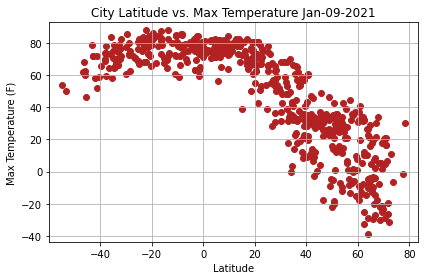

In [29]:
# Taking the needed columns of data for plotting the latitude vs temp scatter plot.

city_lats = weather_data['Lat']
city_max_temps = weather_data['Max Temp']

# Plotted the temperature by latitude into a scatter plot.

plt.scatter(city_lats, city_max_temps, marker='o', facecolors='firebrick')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_max_temps)-5, max(city_max_temps)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvTemp_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

The scatter plot for City Latitude vs Max Temperature shows that the highest temperatures recorded are close to the equator and decreases gradually as we move north or south of the equator.  The shape is reminicient of a normal distribution bell curve.

## Latitude vs. Humidity Plot

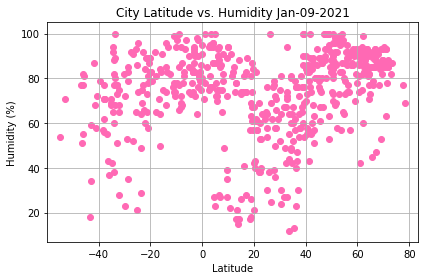

In [30]:
# Calling the needed data column for the latitude and humidity scatter plot

city_humid = weather_data['Humidity']

# Plotted the humidity by latitude into a scatter plot.

plt.scatter(city_lats, city_humid, marker='o', facecolors='hotpink')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_humid)-5, max(city_humid)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvHumid_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

The scatter plot for City Latitude vs Humidity show that humidity is consistently higher near the equator as well as between 40-60.  There is much more varied humidity measurements between 0-40 degrees latitude.

## Latitude vs. Cloudiness Plot

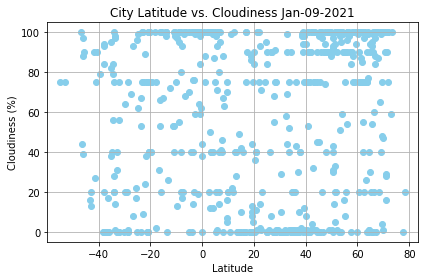

In [31]:
# Grabbing the needed data column for the latitude and cloudiness scatter plot

city_clouds = weather_data['Cloudiness']

# Plotted the cloudiness by latitude into a scatter plot.

plt.scatter(city_lats, city_clouds, marker='o', facecolors='skyblue')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_clouds)-5, max(city_clouds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvClouds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

For the scatter plot of City Latitude vs Cloudiness shows a disparity of cloud variance throughout the world above and below the equator.  It is hard to find a distinctive pattern from this data.

## Latitude vs. Wind Speed Plot

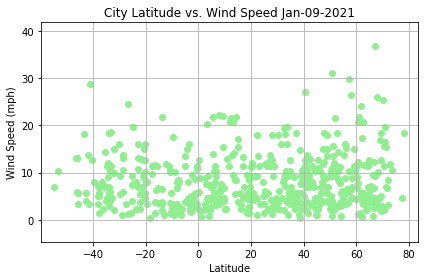

In [32]:
# Grabbing the needed data column for the latitude and wind speed scatter plot.

city_winds = weather_data['Wind Speed']

# Plotted the wind speed by latitude into a scatter plot.

plt.scatter(city_lats, city_winds, marker='o', facecolors='lightgreen')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_winds)-5, max(city_winds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvWinds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

For the scatter plot of City Latitude vs Wind Speed shows that both north and south of the equator there is a consistent wind speed between 0-10 mph.  There are several outliers farther away from the equator which may coincide with wind patterns in those areas resulting in stronger winds than usual.

## Linear Regression

In [33]:
# Creating two data frames from the data for all cities above the equator (Northern Hemisphere)
# and below the equator (Southern Hemisphere)

north_hem_weather = weather_data.loc[weather_data['Lat'] >= 0]
south_hem_weather = weather_data.loc[weather_data['Lat'] < 0]

In [52]:
# Defining a Function to calculate the linear regression and plot the scatter plot and regression.

def line_regression(x_values, dir_title, y_col, point_col, lin_col, y_title, y_unit, y_lab):

    # Taking the needed columns of data from new northern hemisphere data frame for plotting the latitude vs temp scatter plot.

    city_lats = x_values['Lat']
    y_values = x_values[y_col]

    # Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

    (slope, intercept, rvalue, pvalue, stderr) = linregress(city_lats, y_values)
    regress_values = city_lats * slope + intercept
    line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")

    # Plotted the max temp by latitude into a scatter plot and the annotated regression line.

    plt.scatter(city_lats, y_values, marker='o', facecolors=point_col)
    plt.plot(city_lats, regress_values, "r-", color=lin_col)
    plt.annotate(line_string, (min(city_lats), min(y_values)), fontsize=12, color=lin_col)

    # Titled the graph and gave labels to the x and y axes.

    plt.title(f'{dir_title} Hemisphere City Latitude vs. {y_title} {curr_date}')
    plt.xlabel('Latitude')
    plt.ylabel(y_unit)

    # Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

    plt.xlim(min(city_lats)-5, max(city_lats)+5)
    plt.ylim(min(y_values)-5, max(y_values)+5)

    plt.grid()

    # Setting and output name and location for png image of scatter plot.

    output_image = f'Output_Data/{dir_title}Hem_Latv{y_lab}_plot_w_regression{curr_date}.png'
    plt.tight_layout()
    plt.savefig(output_image)

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8598308218522283


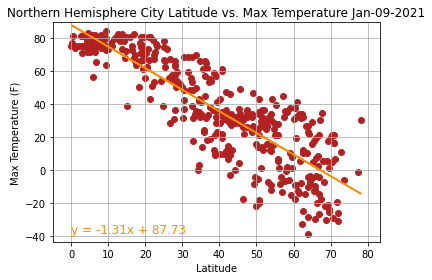

In [53]:
line_regression(north_hem_weather, 'Northern', 'Max Temp', 'firebrick', 'darkorange', 'Max Temperature', 'Max Temperature (F)', 'Temp')

The line regression for the City Latitude vs Max Temperature in the Northern Hemisphere scatter plot shows a strong negative correlation.  As we move north of the equator, the temperature decreases gradually.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4340276867645156


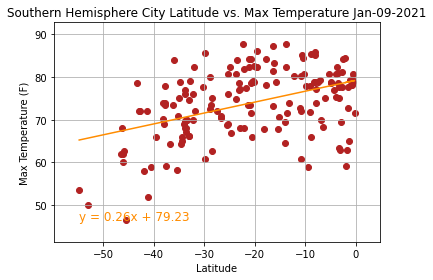

In [54]:
line_regression(south_hem_weather, 'Southern', 'Max Temp', 'firebrick', 'darkorange', 'Max Temperature', 'Max Temperature (F)', 'Temp')

The line regression for City Latitude vs Max Temperature in the Southern Hemisphere shows a fairly strong positive correlation.  As we move south of the equator temperatures decrease overall.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.34398322752823934


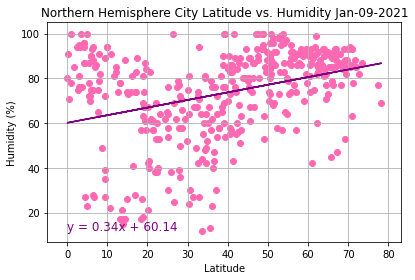

In [55]:
line_regression(north_hem_weather, 'Northern', 'Humidity', 'hotpink', 'purple', 'Humidity', 'Humidity (%)', 'Humid')

The line regression for City Latitude vs Humidity in the Northern Hemisphere shows a fairly moderate positive correlation.  Humidity is high near the equator, measurments plummet more between 10-40 degrees latitude then there are more high humidity measurements between 40-60 degrees latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42776194363074976


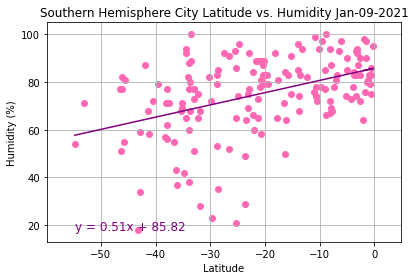

In [56]:
line_regression(south_hem_weather, 'Southern', 'Humidity', 'hotpink', 'purple', 'Humidity', 'Humidity (%)', 'Humid')

The line regression for City Latitude vs. Humidity in the Southern Hemisphere shows a fairly weak positive correlation.  Humidity is high fairly consistently from the equator to -40 degrees latitude. There are a handful of low humidity measurements in between -10 and -40 degrees latitude which is similar to the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21871733819370187


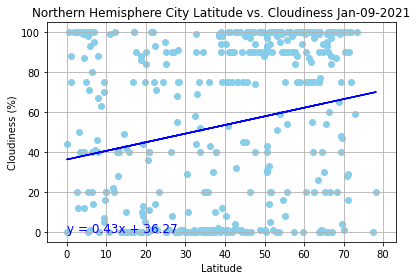

In [57]:
line_regression(north_hem_weather, 'Northern', 'Cloudiness', 'skyblue', 'blue', 'Cloudiness', 'Cloudiness (%)', 'Cloud')

The line regression for City Latitude vs Cloudiness in the Northern Hemisphere shows a weak positive correlation.  The disparity in the location of the measurements it is hard to find a consistent pattern, one potential one is that there are more measurements of high cloudiness between 50-70 degrees latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23389365085214922


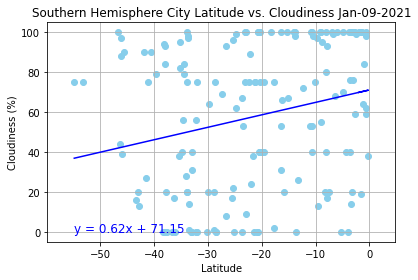

In [58]:
line_regression(south_hem_weather, 'Southern', 'Cloudiness', 'skyblue', 'blue', 'Cloudiness', 'Cloudiness (%)', 'Cloud')

The line regression for City Latitude vs Cloudiness in the Southern Hemisphere shows a very weak positive correlation.  There seem to be more high measurements of cloudiness as we get closer to the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06810638961203905


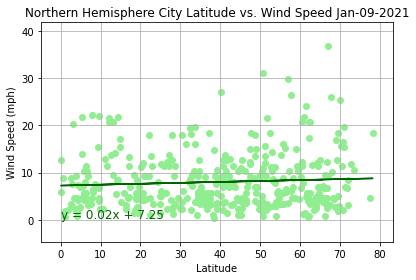

In [59]:
line_regression(north_hem_weather, 'Northern', 'Wind Speed', 'lightgreen', 'darkgreen', 'Wind Speed', 'Wind Speed (mph)', 'Wind')

The line regression for City Latitude vs Wind Speed in the Northern Hemisphere shows a very weak positive correlation.  It is practically a straight line with the wind speed remaining mostly consistent (10-20 mph) throughout the Northern Hemisphere with only a few outliers around and north of 40 degrees latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.23444162488149695


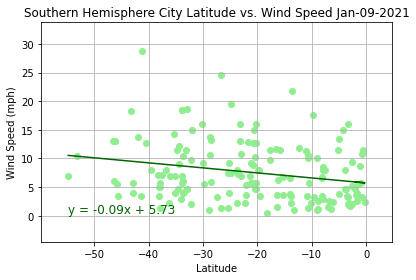

In [60]:
line_regression(south_hem_weather, 'Southern', 'Wind Speed', 'lightgreen', 'darkgreen', 'Wind Speed', 'Wind Speed (mph)', 'Wind')

The line regression for City Latitude vs Wind Speed in the Southern Hemisphere shows a fairly weak negative correlation.  Most of the measurements closer to the equator are low in wind speed and increase farther from the equator.